In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/DATASET/raw-data.csv')
df.head()

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020/01/22,1001,Autauga County,1,Alabama,0.0,0.0,F,F,F,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
1,2020/01/23,1001,Autauga County,1,Alabama,0.0,0.0,F,F,F,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
2,2020/01/24,1001,Autauga County,1,Alabama,0.0,0.0,F,F,F,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
3,2020/01/25,1001,Autauga County,1,Alabama,0.0,0.0,F,F,F,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
4,2020/01/26,1001,Autauga County,1,Alabama,0.0,0.0,F,F,D,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589852 entries, 0 to 1589851
Data columns (total 71 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   date                                           1589852 non-null  object 
 1   county_fips                                    1589852 non-null  int64  
 2   county_name                                    1589852 non-null  object 
 3   state_fips                                     1589852 non-null  int64  
 4   state_name                                     1589852 non-null  object 
 5   covid_19_confirmed_cases                       1589852 non-null  float64
 6   covid_19_deaths                                1589852 non-null  float64
 7   social_distancing_total_grade                  1589209 non-null  object 
 8   social_distancing_visitation_grade             1295848 non-null  object 
 9   social_distancing_encoun

In [3]:
df.shape

(1589852, 71)

In [4]:
df.isnull().sum()

,0
date,0
county_fips,0
county_name,0
state_fips,0
state_name,0
...,...
age_80_84,0
age_85_or_higher,0
immigrant_student_ratio,0
death_ratio,42504


In [5]:
missing_cols=df[['social_distancing_total_grade',
                 'social_distancing_visitation_grade',
                 'social_distancing_encounters_grade',
                 'retail_and_recreation_mobility_percent_change',
                 'grocery_and_pharmacy_mobility_percent_change',
                 'parks_mobility_percent_change',
                 'transit_stations_mobility_percent_change',
                 'workplaces_mobility_percent_change',
                 'residential_mobility_percent_change',
                 'daily_state_test',
                 'precipitation',
                 'temperature',
                 'percent_of_vaccinated_residents',
                 'weekly_reported_total_ICU_beds',
                 'weekly_occupied_ICU_beds',
                 'weekly_admission',
                 'weekly_reported_total_inpatient_beds',
                 'weekly_occupied_inpatient_beds',
                 'religious_congregation_ratio',
                 'percent_of_insured_residents',
                 'death_ratio']]

missing_cols.head()

,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,retail_and_recreation_mobility_percent_change,grocery_and_pharmacy_mobility_percent_change,parks_mobility_percent_change,transit_stations_mobility_percent_change,workplaces_mobility_percent_change,residential_mobility_percent_change,daily_state_test,...,temperature,percent_of_vaccinated_residents,weekly_reported_total_ICU_beds,weekly_occupied_ICU_beds,weekly_admission,weekly_reported_total_inpatient_beds,weekly_occupied_inpatient_beds,religious_congregation_ratio,percent_of_insured_residents,death_ratio
0,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,68.0,91.278314,0.00964
1,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,68.0,91.278314,0.00964
2,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,68.0,91.278314,0.00964
3,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,68.0,91.278314,0.00964
4,F,F,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,68.0,91.278314,0.00964


In [6]:
missing_cols.isnull().sum()

,0
social_distancing_total_grade,643
social_distancing_visitation_grade,294004
social_distancing_encounters_grade,2035
retail_and_recreation_mobility_percent_change,804900
grocery_and_pharmacy_mobility_percent_change,883682
parks_mobility_percent_change,1308631
transit_stations_mobility_percent_change,1142052
workplaces_mobility_percent_change,411931
residential_mobility_percent_change,921312
daily_state_test,141087


In [7]:
missing_cols.isnull().mean() *100

,0
social_distancing_total_grade,0.040444
social_distancing_visitation_grade,18.492539
social_distancing_encounters_grade,0.127999
retail_and_recreation_mobility_percent_change,50.627354
grocery_and_pharmacy_mobility_percent_change,55.582658
parks_mobility_percent_change,82.311498
transit_stations_mobility_percent_change,71.833856
workplaces_mobility_percent_change,25.910022
residential_mobility_percent_change,57.949545
daily_state_test,8.874222


In [8]:
# Calculate the percentage of missing values for each column in `missing_cols`
missing_percent = missing_cols.isnull().mean() * 100

# Identify columns where the percentage of missing values is more than 65%
cols_to_drop = missing_percent[missing_percent > 65].index

# Drop the identified columns from the `df` DataFrame
df = df.drop(columns=cols_to_drop)

# Display the remaining columns in `df` and their missing value counts
print("Remaining columns after dropping:")
print(df.columns)
print("\nMissing values after dropping columns:")
df.isnull().sum()

Remaining columns after dropping:
Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change',
       'residential_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'weekly_reported_total_ICU_beds', 'weekly_occupied_ICU_beds',
       'weekly_reported_total_inpatient_beds',
       'weekly_occupied_inpatient_beds', 'total_population',
       'proportion_female', 'area', 'population_density', 'latitude',
       'longitude', 'hospital_beds_ratio', 'ventilator_capacity_ratio',
       'intensive_care_unit_(ICU)_bed_ratio', 'hous

,0
date,0
county_fips,0
county_name,0
state_fips,0
state_name,0
...,...
age_80_84,0
age_85_or_higher,0
immigrant_student_ratio,0
death_ratio,42504


In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['county_fips', 'state_fips', 'covid_19_confirmed_cases', 'covid_19_deaths', 'retail_and_recreation_mobility_percent_change', 'grocery_and_pharmacy_mobility_percent_change', 'workplaces_mobility_percent_change', 'residential_mobility_percent_change', 'daily_state_test', 'precipitation', 'temperature', 'percent_of_vaccinated_residents', 'weekly_reported_total_ICU_beds', 'weekly_occupied_ICU_beds', 'weekly_reported_total_inpatient_beds', 'weekly_occupied_inpatient_beds', 'total_population', 'proportion_female', 'area', 'population_density', 'latitude', 'longitude', 'hospital_beds_ratio', 'ventilator_capacity_ratio', 'intensive_care_unit_(ICU)_bed_ratio', 'housing_density', 'less_than_high_school_diploma', 'high_school_diploma_only', 'some_college_or_higher', 'academic_population_ratio', 'percent_of_smokers', 'percent_of_diabetes', 'religious_congregation_ratio', 'political_party', 'airport_distance', 'passenger_load_ratio', 'number_of_meat_plants', 'median_household_in

In [10]:
# Fill numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Fill categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values if there's a tie, take the first one
        df[col].fillna(mode_val, inplace=True)

# Verify that there are no more missing values
print("\nMissing values after filling:")
df.isnull().sum()


Missing values after filling:


,0
date,0
county_fips,0
county_name,0
state_fips,0
state_name,0
...,...
age_80_84,0
age_85_or_higher,0
immigrant_student_ratio,0
death_ratio,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589852 entries, 0 to 1589851
Data columns (total 68 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   date                                           1589852 non-null  object 
 1   county_fips                                    1589852 non-null  int64  
 2   county_name                                    1589852 non-null  object 
 3   state_fips                                     1589852 non-null  int64  
 4   state_name                                     1589852 non-null  object 
 5   covid_19_confirmed_cases                       1589852 non-null  float64
 6   covid_19_deaths                                1589852 non-null  float64
 7   social_distancing_total_grade                  1589852 non-null  object 
 8   social_distancing_visitation_grade             1589852 non-null  object 
 9   social_distancing_encoun

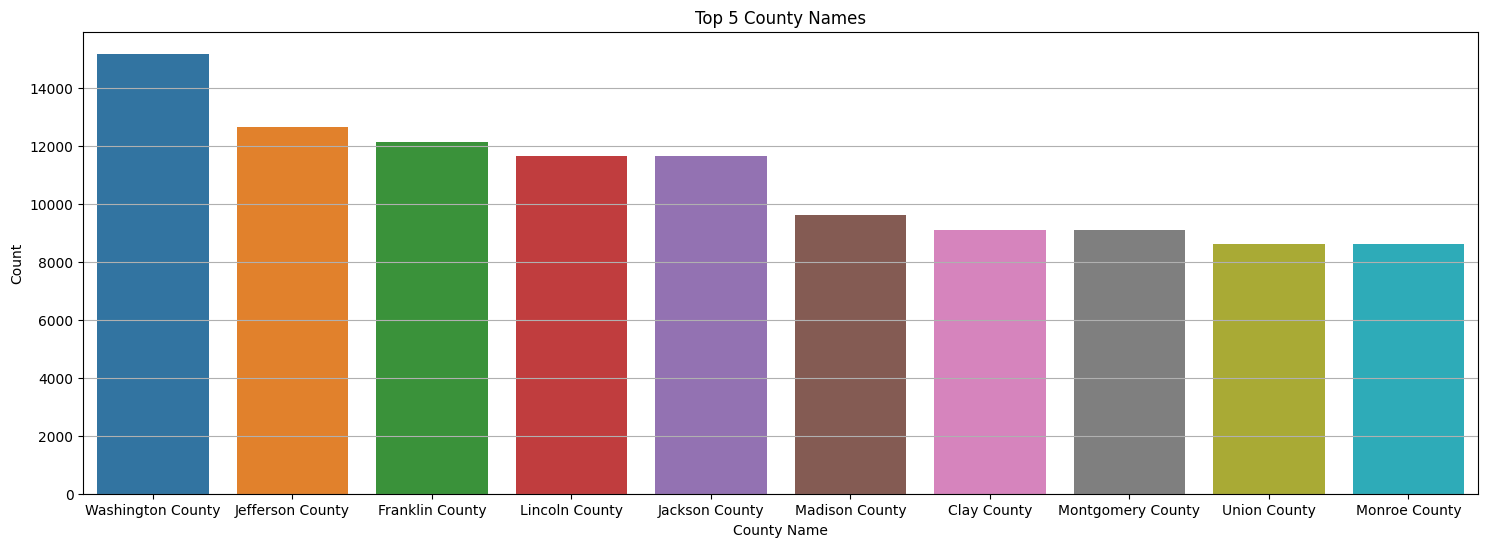

In [12]:
county_counts = df['county_name'].value_counts().nlargest(10)

plt.figure(figsize=(18, 6))
sns.barplot(x=county_counts.index, y=county_counts.values, palette='tab10')
plt.title('Top 5 County Names')
plt.xlabel('County Name')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

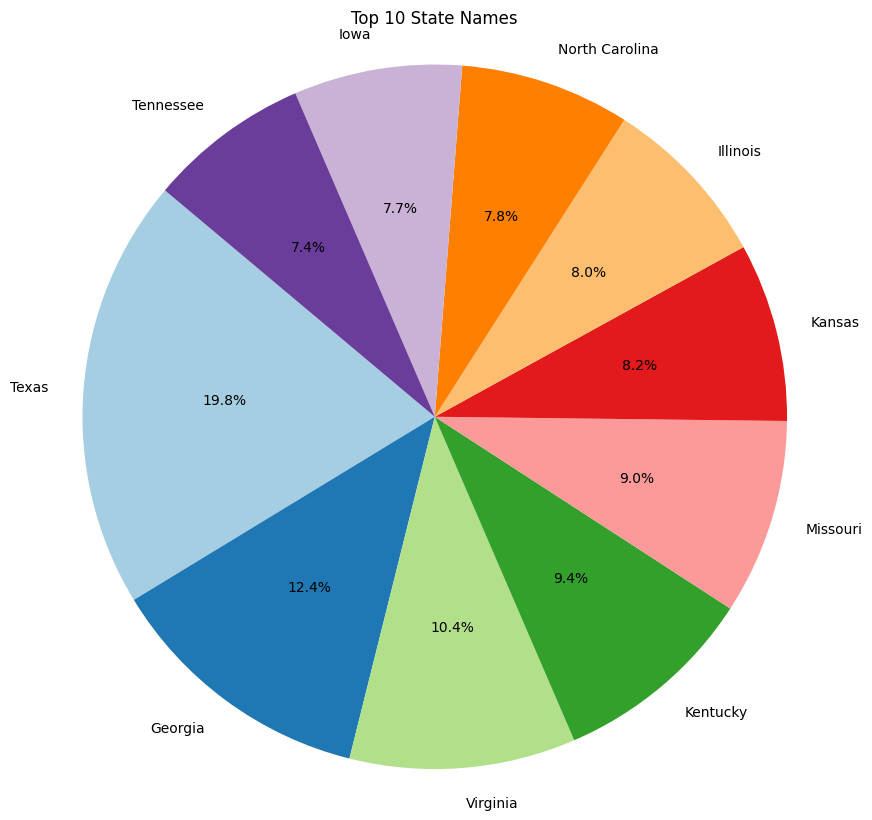

In [13]:
state_counts = df['state_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 10))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 State Names')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

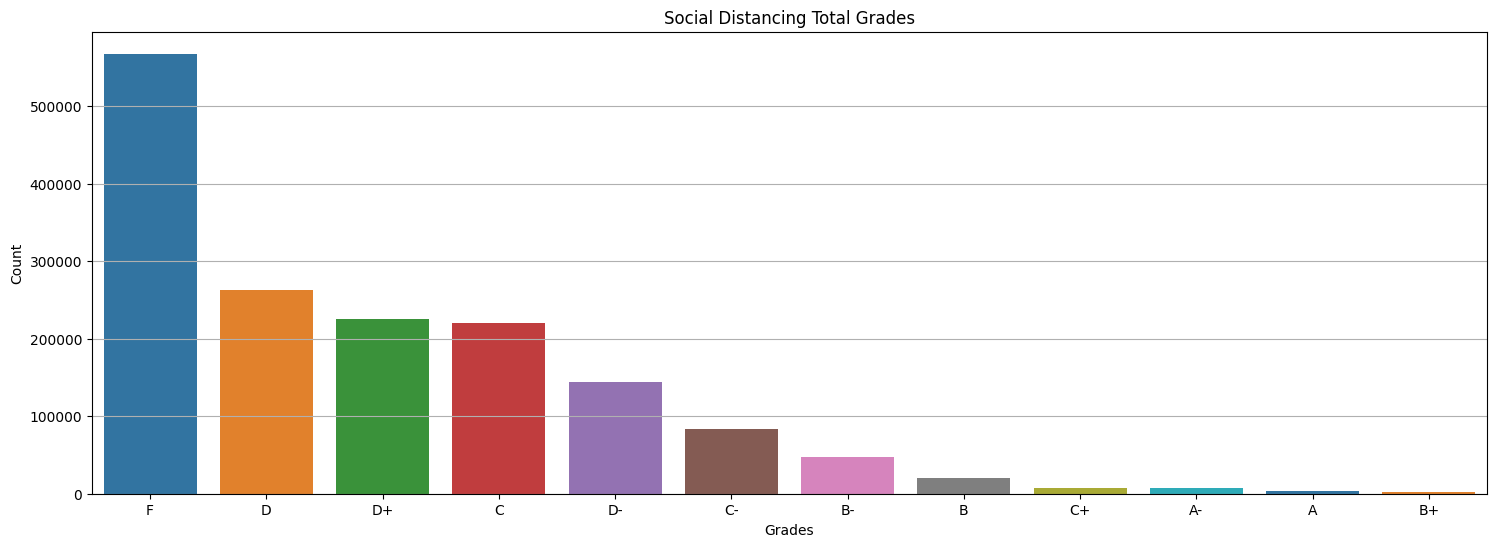

In [14]:
social_distancing_total_grade_counts = df['social_distancing_total_grade'].value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=social_distancing_total_grade_counts.index,
            y=social_distancing_total_grade_counts.values,
            palette='tab10')
plt.title('Social Distancing Total Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

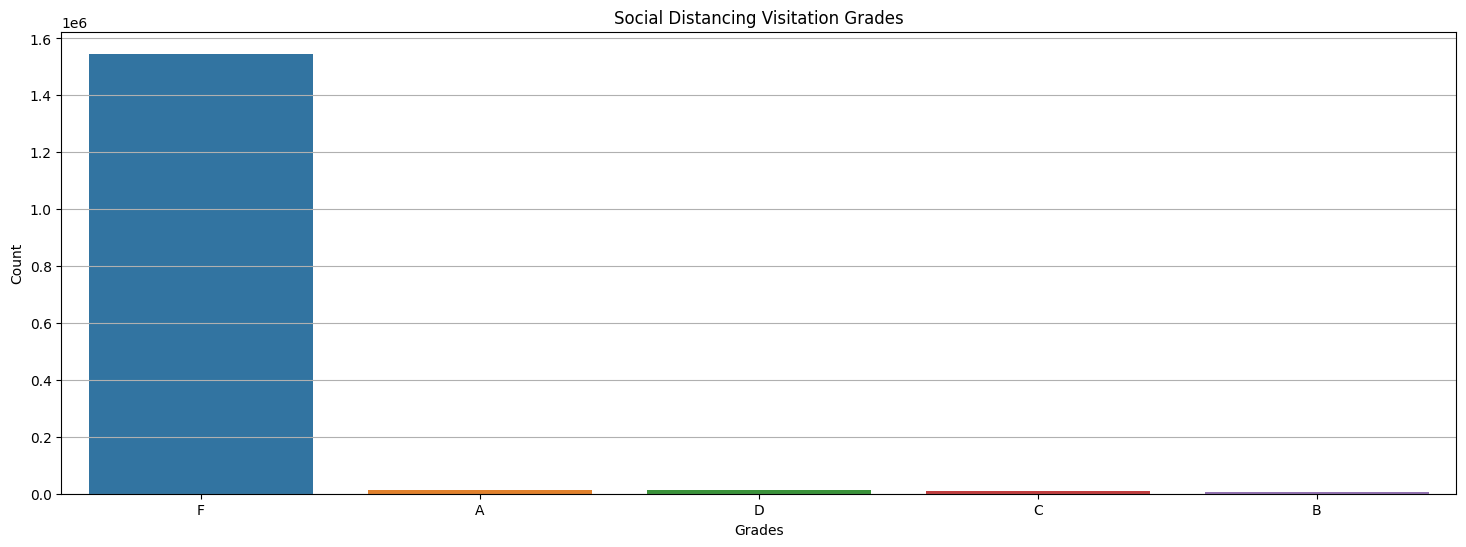

In [15]:
social_distancing_visitation_grade_counts = df['social_distancing_visitation_grade'].value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=social_distancing_visitation_grade_counts.index,
            y=social_distancing_visitation_grade_counts.values,
            palette='tab10')
plt.title('Social Distancing Visitation Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

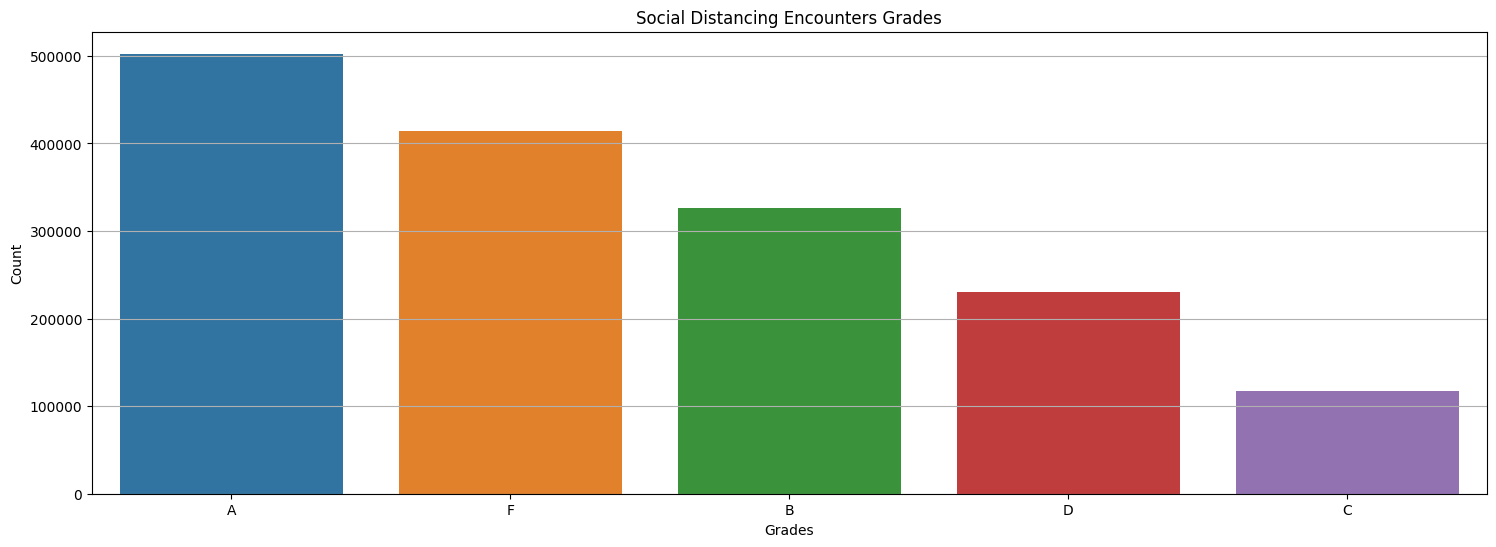

In [16]:
social_distancing_encounters_grade_counts = df['social_distancing_encounters_grade'].value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=social_distancing_encounters_grade_counts.index,
            y=social_distancing_encounters_grade_counts.values,
            palette='tab10')
plt.title('Social Distancing Encounters Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

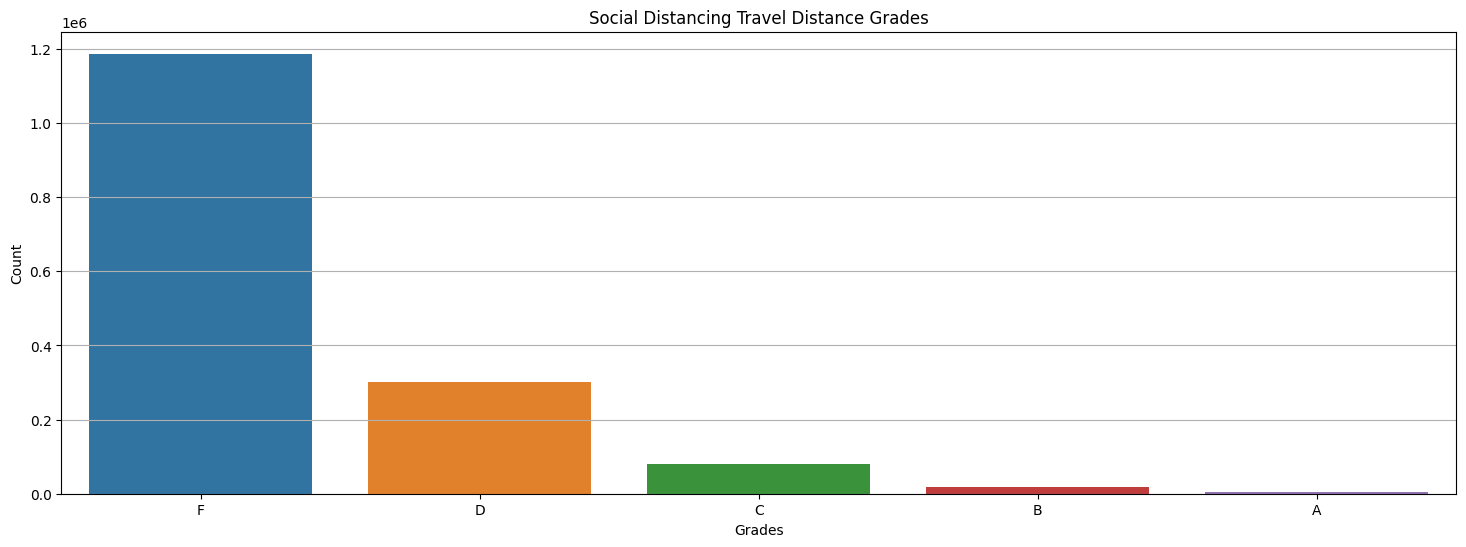

In [17]:
social_distancing_travel_distance_grade_counts = df['social_distancing_travel_distance_grade'].value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=social_distancing_travel_distance_grade_counts.index,
            y=social_distancing_travel_distance_grade_counts.values,
            palette='tab10')
plt.title('Social Distancing Travel Distance Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

<Axes: >

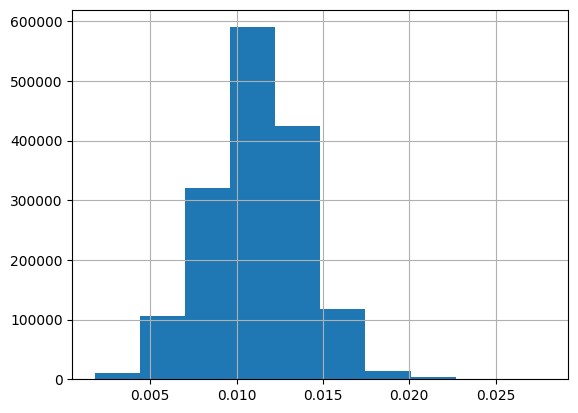

In [18]:
df['death_ratio'].hist()

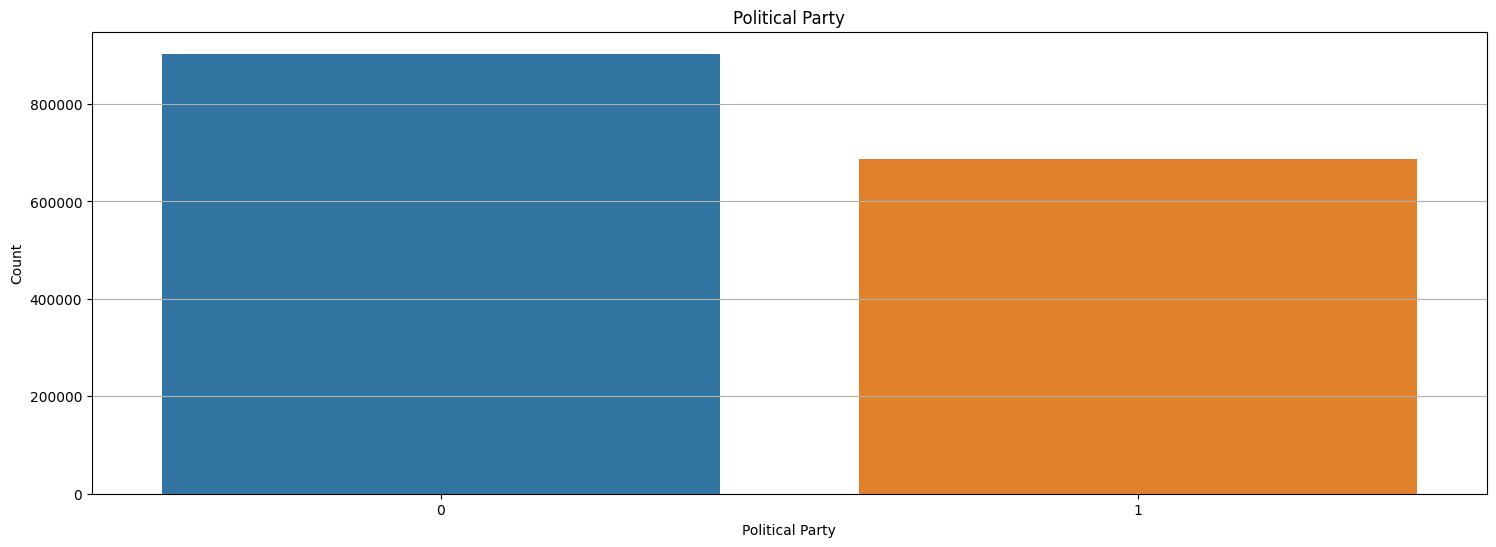

In [19]:
political_party_counts = df['political_party'].value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=political_party_counts.index,
            y=political_party_counts.values,
            palette='tab10')
plt.title('Political Party')
plt.xlabel('Political Party')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

<Axes: >

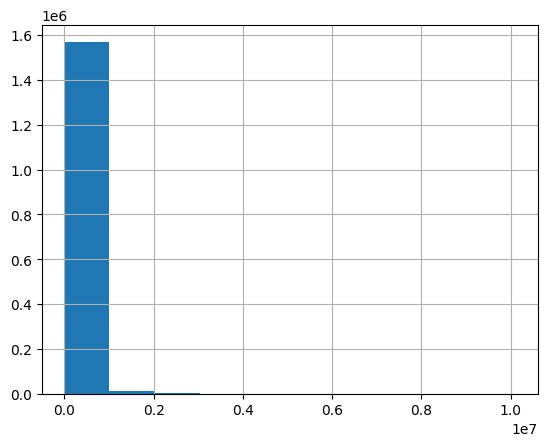

In [20]:
df['total_population'].hist()

In [21]:
df.columns

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change',
       'residential_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'weekly_reported_total_ICU_beds', 'weekly_occupied_ICU_beds',
       'weekly_reported_total_inpatient_beds',
       'weekly_occupied_inpatient_beds', 'total_population',
       'proportion_female', 'area', 'population_density', 'latitude',
       'longitude', 'hospital_beds_ratio', 'ventilator_capacity_ratio',
       'intensive_care_unit_(ICU)_bed_ratio', 'housing_density',
       'less_than_hi

In [22]:
df.drop(columns=['date', 'county_fips', 'county_name', 'state_fips',
                 'state_name', 'latitude','longitude'], inplace=True)
df.head()

,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,retail_and_recreation_mobility_percent_change,grocery_and_pharmacy_mobility_percent_change,workplaces_mobility_percent_change,residential_mobility_percent_change,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,0.0,0.0,F,F,F,F,-7.0,0.0,-21.0,6.0,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
1,0.0,0.0,F,F,F,F,-7.0,0.0,-21.0,6.0,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
2,0.0,0.0,F,F,F,F,-7.0,0.0,-21.0,6.0,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
3,0.0,0.0,F,F,F,F,-7.0,0.0,-21.0,6.0,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753
4,0.0,0.0,F,F,D,F,-7.0,0.0,-21.0,6.0,...,6,5,4,3,2,1,1,0.0,0.00964,1.13753


In [23]:
df.columns

Index(['covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change',
       'residential_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'weekly_reported_total_ICU_beds', 'weekly_occupied_ICU_beds',
       'weekly_reported_total_inpatient_beds',
       'weekly_occupied_inpatient_beds', 'total_population',
       'proportion_female', 'area', 'population_density',
       'hospital_beds_ratio', 'ventilator_capacity_ratio',
       'intensive_care_unit_(ICU)_bed_ratio', 'housing_density',
       'less_than_high_school_diploma', 'high_school_diploma_only',
       'some_college_or_higher', 'academic_populat

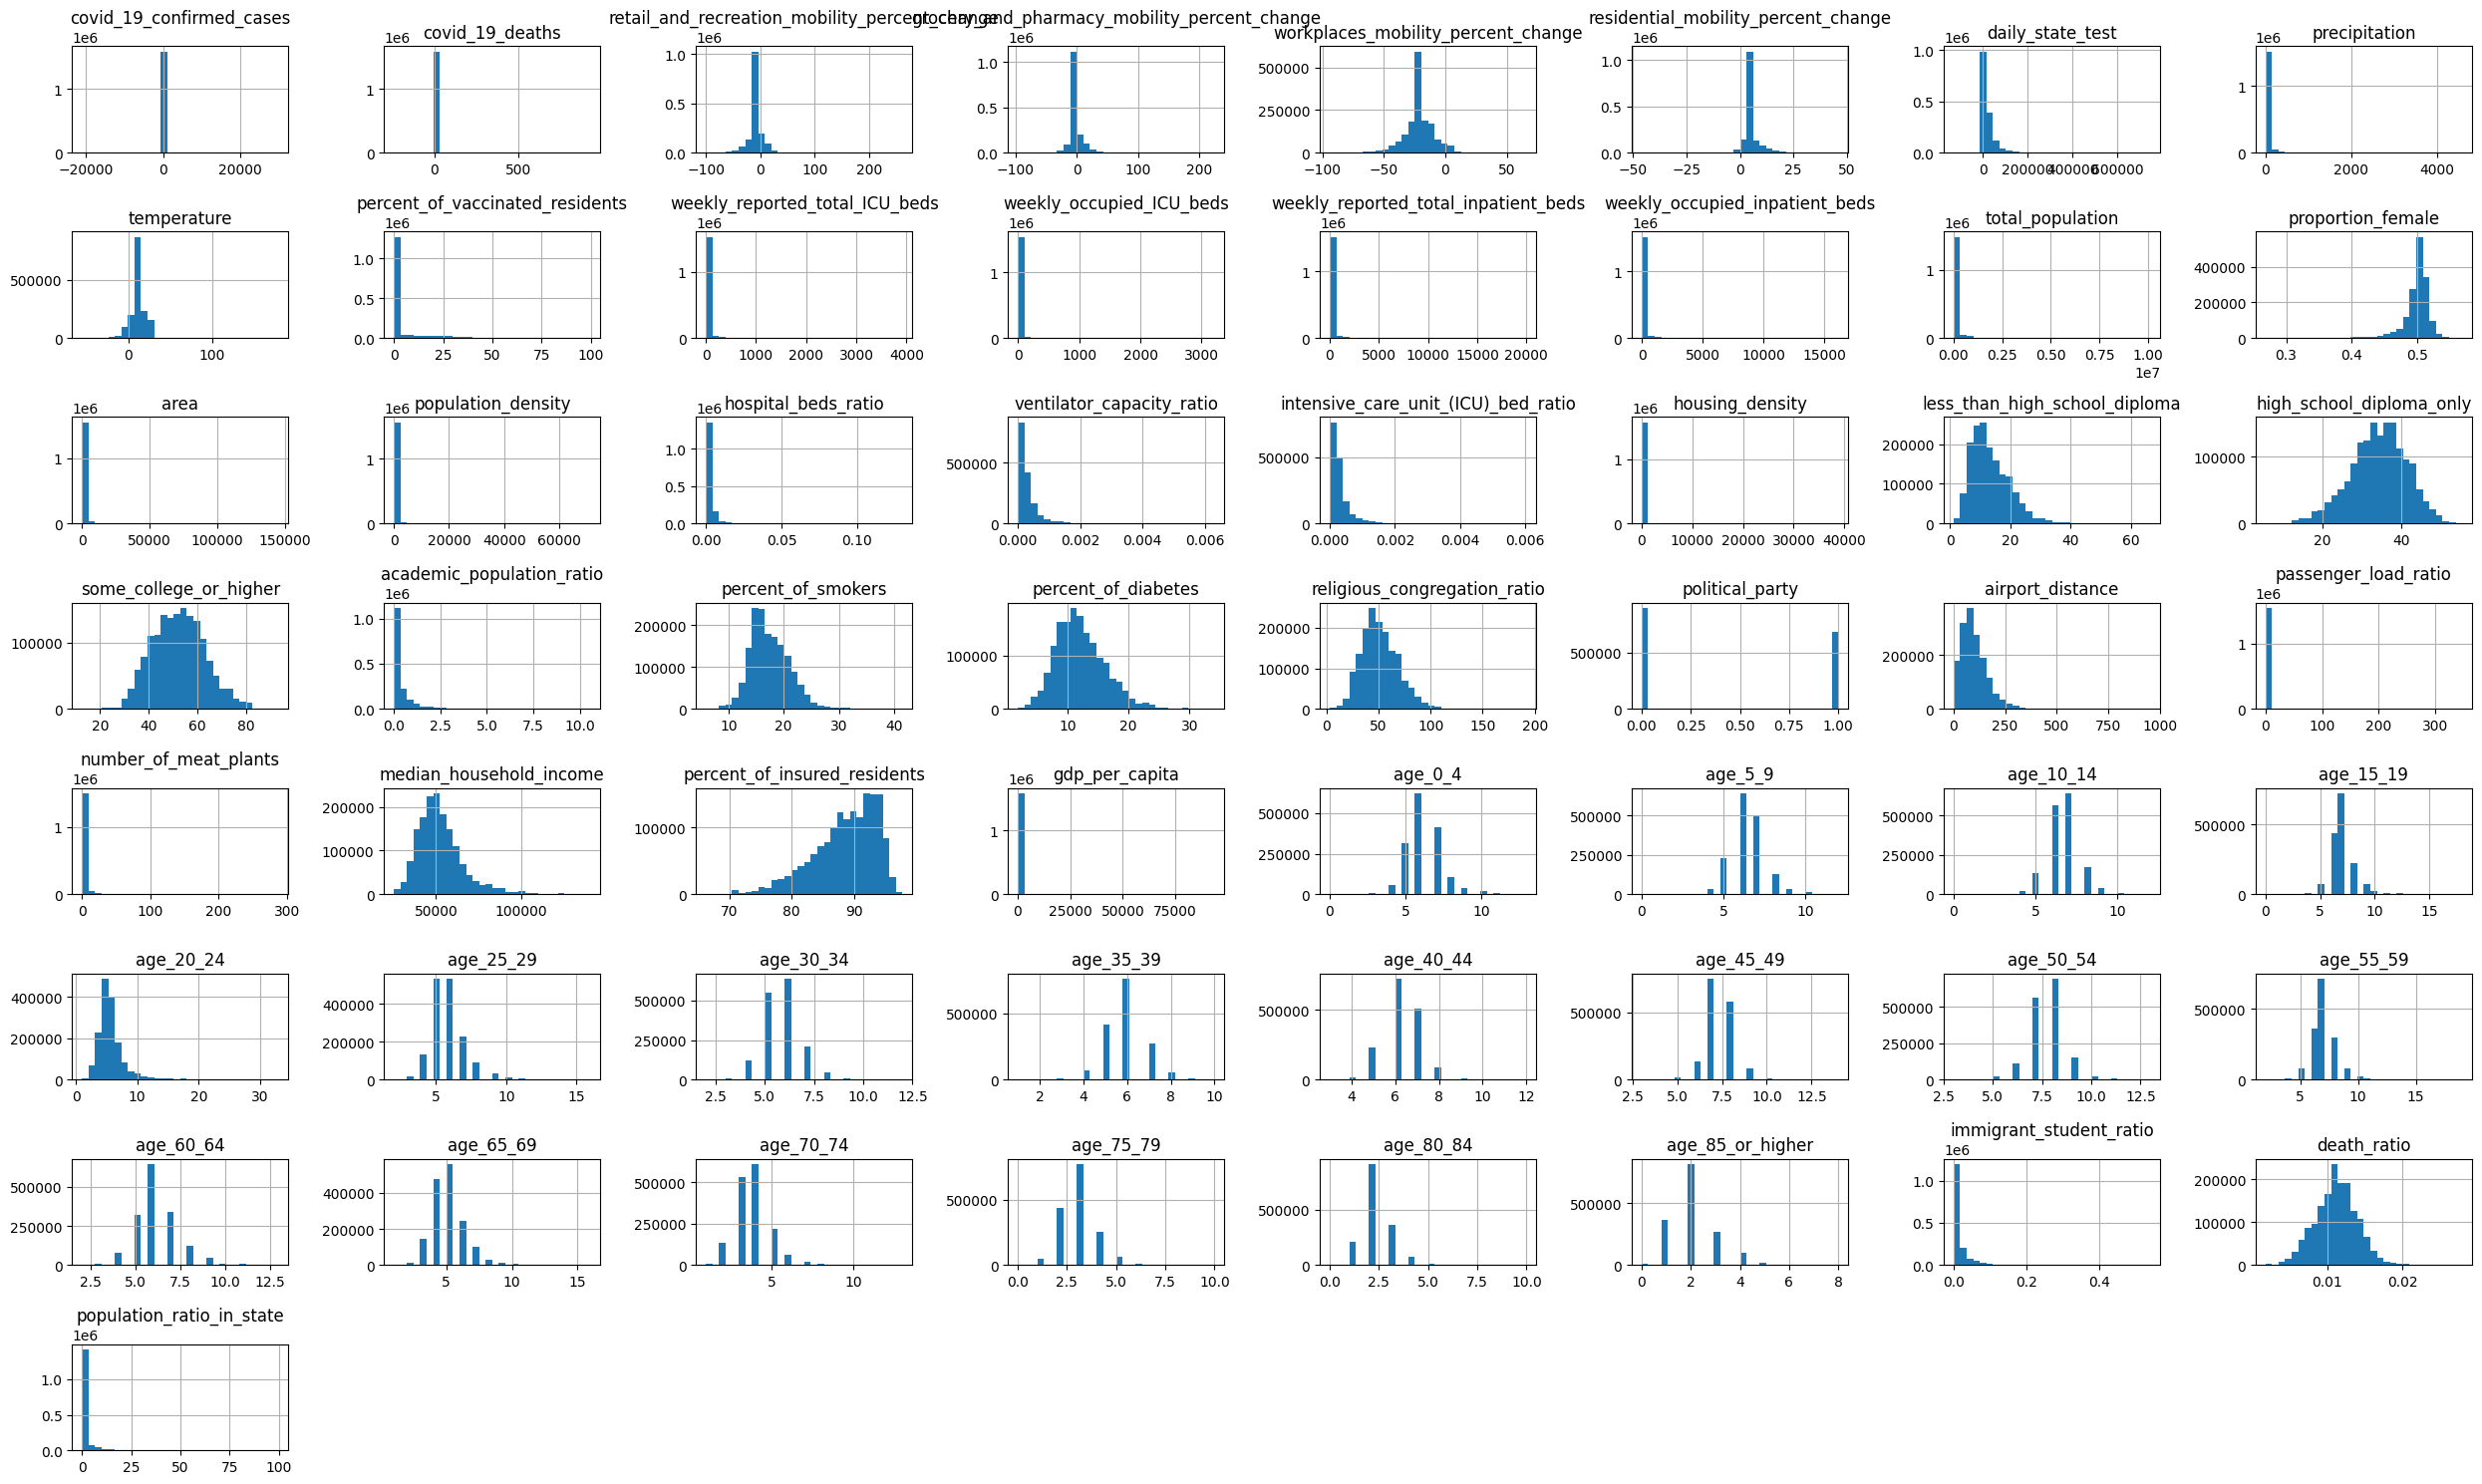

In [24]:
# Visualize histograms for all columns
df.hist(figsize=(25, 15), bins=30)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
columns_to_scale = ['covid_19_confirmed_cases', 'covid_19_deaths',
                    'retail_and_recreation_mobility_percent_change',
                    'grocery_and_pharmacy_mobility_percent_change','workplaces_mobility_percent_change',
                    'residential_mobility_percent_change', 'daily_state_test','precipitation',
                    'temperature', 'percent_of_vaccinated_residents',
                    'weekly_reported_total_ICU_beds', 'weekly_occupied_ICU_beds',
                    'weekly_reported_total_inpatient_beds','weekly_occupied_inpatient_beds',
                    'total_population','proportion_female', 'area', 'population_density',
                    'hospital_beds_ratio', 'ventilator_capacity_ratio',
                    'intensive_care_unit_(ICU)_bed_ratio', 'housing_density',
                    'less_than_high_school_diploma', 'high_school_diploma_only',
                    'some_college_or_higher', 'academic_population_ratio',
                    'percent_of_smokers', 'percent_of_diabetes',
                    'religious_congregation_ratio', 'airport_distance',
                    'passenger_load_ratio', 'number_of_meat_plants',
                    'median_household_income', 'percent_of_insured_residents',
                    'gdp_per_capita', 'immigrant_student_ratio', 'death_ratio', 'population_ratio_in_state']

# Check if all columns to scale exist in the dataframe
missing_cols_in_df = [col for col in columns_to_scale if col not in df.columns]
if missing_cols_in_df:
    print(f"Warning: The following columns to scale are not in the DataFrame: {missing_cols_in_df}")
    # Update columns_to_scale to only include columns present in the DataFrame
    columns_to_scale = [col for col in columns_to_scale if col in df.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nDataFrame after Standard Scaling:")
display(df.head())


DataFrame after Standard Scaling:


,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,retail_and_recreation_mobility_percent_change,grocery_and_pharmacy_mobility_percent_change,workplaces_mobility_percent_change,residential_mobility_percent_change,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,-0.143492,-0.111067,F,F,F,F,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
1,-0.143492,-0.111067,F,F,F,F,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
2,-0.143492,-0.111067,F,F,F,F,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
3,-0.143492,-0.111067,F,F,F,F,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
4,-0.143492,-0.111067,F,F,D,F,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422


In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Identify categorical columns again after potential modifications
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Initialize OrdinalEncoder
# Use handle_unknown='use_encoded_value' and unknown_value=-1
# to handle potential unseen categories during testing or prediction
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

# Apply ordinal encoding to the categorical columns
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

print("\nDataFrame after Ordinal Encoding:")
display(df.head())


DataFrame after Ordinal Encoding:


,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,retail_and_recreation_mobility_percent_change,grocery_and_pharmacy_mobility_percent_change,workplaces_mobility_percent_change,residential_mobility_percent_change,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,-0.143492,-0.111067,11.0,4.0,4.0,4.0,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
1,-0.143492,-0.111067,11.0,4.0,4.0,4.0,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
2,-0.143492,-0.111067,11.0,4.0,4.0,4.0,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
3,-0.143492,-0.111067,11.0,4.0,4.0,4.0,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422
4,-0.143492,-0.111067,11.0,4.0,3.0,4.0,0.032611,-0.046219,0.055605,-0.122985,...,6,5,4,3,2,1,1,-0.445736,-0.555746,-0.108422


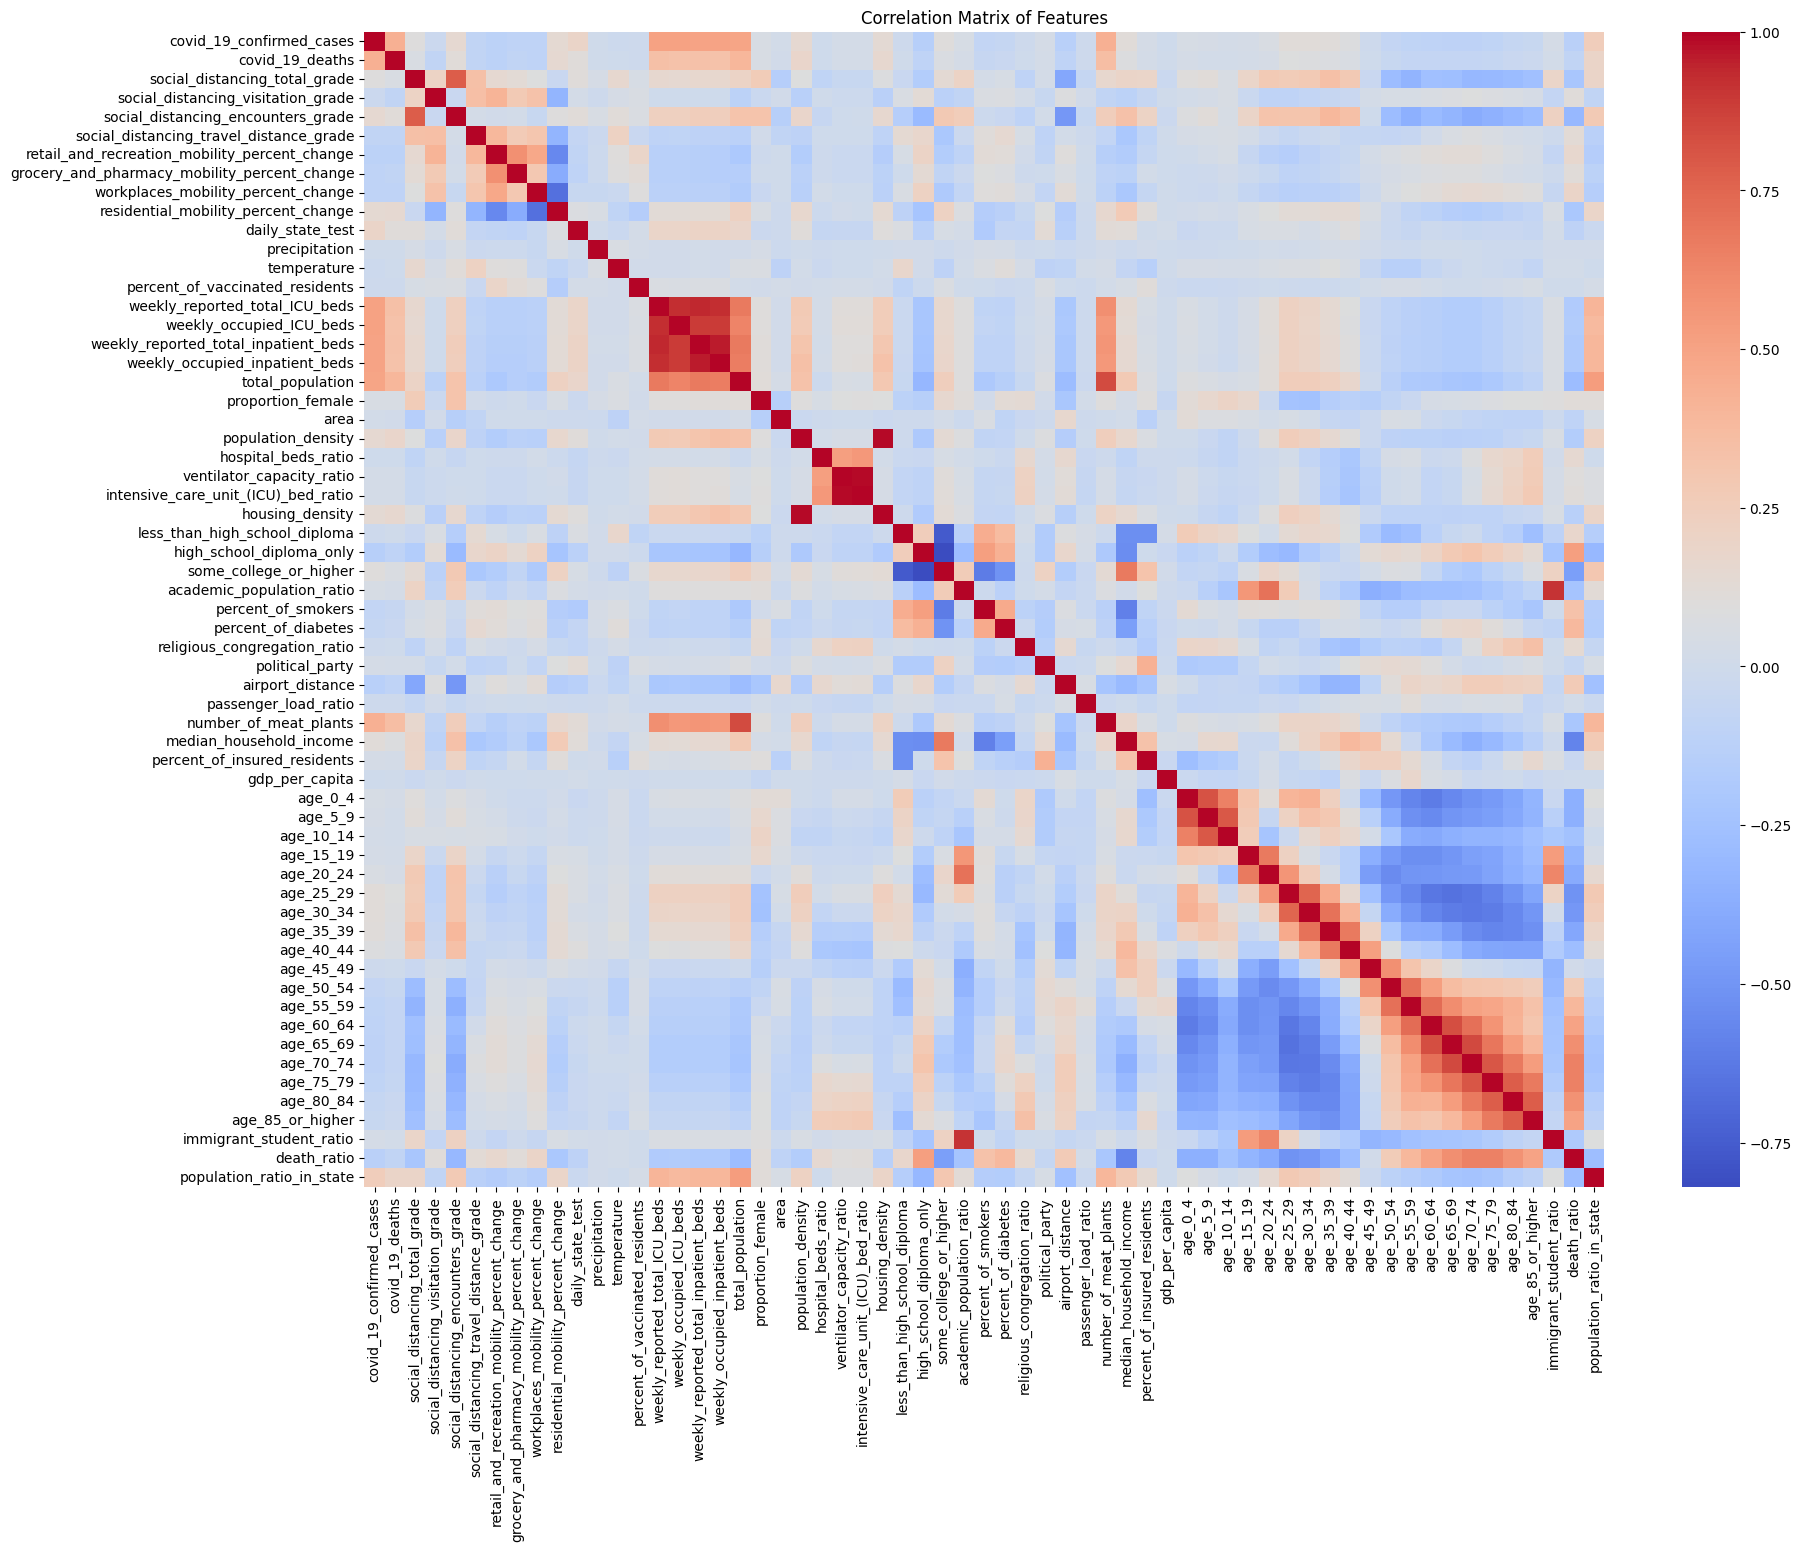

In [27]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [28]:
from sklearn.model_selection import KFold

# Define the target variable (adjust 'death_ratio' if your target is different)
target_variable = 'death_ratio'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Initialize KFold
n_splits = 5 # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Dictionary to store feature importance scores (e.g., average absolute correlation with the target)
feature_importance = {}

# Loop through features to calculate average correlation across folds
# We'll calculate the absolute correlation as a simple measure of importance
for col in X.columns:
    absolute_correlations = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Calculate correlation between the feature and the target on the training fold
        if y_train.std() != 0 and X_train[col].std() != 0: # Avoid division by zero
            correlation = X_train[col].corr(y_train)
            absolute_correlations.append(abs(correlation))
        else:
            absolute_correlations.append(0) # Append 0 if correlation cannot be calculated

    feature_importance[col] = np.mean(absolute_correlations)

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)

print("\nFeatures ranked by average absolute correlation with the target ('{}') across KFold splits:".format(target_variable))
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

top_n = 10
top_features = [feature for feature, importance in sorted_features[:top_n]]

print(f"\nTop {top_n} features for training: {top_features}")


Features ranked by average absolute correlation with the target ('death_ratio') across KFold splits:
age_70_74: 0.6512
age_75_79: 0.6498
age_65_69: 0.5940
median_household_income: 0.5836
age_80_84: 0.5764
high_school_diploma_only: 0.5174
age_25_29: 0.5103
age_60_64: 0.5020
age_85_or_higher: 0.4964
age_30_34: 0.4908
some_college_or_higher: 0.4506
age_35_39: 0.4114
age_55_59: 0.3932
age_20_24: 0.3868
percent_of_diabetes: 0.3833
age_0_4: 0.3634
age_5_9: 0.3581
age_15_19: 0.3351
percent_of_smokers: 0.3262
social_distancing_encounters_grade: 0.3087
total_population: 0.2803
population_ratio_in_state: 0.2759
age_40_44: 0.2740
airport_distance: 0.2694
age_50_54: 0.2637
age_10_14: 0.2490
academic_population_ratio: 0.2330
social_distancing_total_grade: 0.2213
number_of_meat_plants: 0.2113
residential_mobility_percent_change: 0.2071
workplaces_mobility_percent_change: 0.1915
immigrant_student_ratio: 0.1844
weekly_reported_total_inpatient_beds: 0.1831
weekly_occupied_inpatient_beds: 0.1817
weekly

In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
features = ['age_70_74', 'age_75_79', 'age_65_69',
            'median_household_income', 'age_80_84',
            'high_school_diploma_only', 'age_25_29',
            'age_60_64', 'age_85_or_higher', 'age_30_34']
X = df[features]
y = df['death_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Print the shapes of the resulting sets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1271881, 10)
Shape of X_test: (317971, 10)
Shape of y_train: (1271881,)
Shape of y_test: (317971,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Perform Cross Validation Score
cv_scores = cross_val_score(linear_reg_model, X_train, y_train,
                            cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"\nCross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE Score: {np.mean(cv_rmse_scores):.4f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.3314
Root Mean Squared Error (RMSE): 0.5757
Mean Absolute Error (MAE): 0.4190
Mean Absolute Percentage Error (MAPE): 2.1755
R-squared (R2): 0.6707

Cross-Validation RMSE Scores: [0.57319959 0.57481689 0.57098187 0.57319501 0.57026323]
Mean CV RMSE Score: 0.5725


In [33]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_reg_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_reg_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

# Perform Cross Validation Score
cv_scores_dt = cross_val_score(dt_reg_model, X_train, y_train,
                               cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_dt = np.sqrt(-cv_scores_dt)
print(f"\nDecision Tree Cross-Validation RMSE Scores: {cv_rmse_scores_dt}")
print(f"Mean Decision Tree CV RMSE Score: {np.mean(cv_rmse_scores_dt):.4f}")


Decision Tree Regressor Model Evaluation:
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.0000
R-squared (R2): 1.0000

Decision Tree Cross-Validation RMSE Scores: [4.32987880e-15 4.31559521e-15 4.31810353e-15 4.32110014e-15
 4.34884405e-15]
Mean Decision Tree CV RMSE Score: 0.0000


In [35]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nK-Nearest Neighbors Regressor (KNN) Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_knn:.4f}")
print(f"R-squared (R2): {r2_knn:.4f}")


K-Nearest Neighbors Regressor (KNN) Model Evaluation:
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.0000
R-squared (R2): 1.0000


In [36]:
!pip install xgboost -q

import xgboost as xgb

# Initialize the XGBoost Regressor model
# You can tune the hyperparameters like n_estimators, learning_rate, max_depth, etc.
xgb_reg_model = xgb.XGBRegressor(objective='reg:squarederror', # Regression task
                                 n_estimators=100,             # Number of boosting rounds
                                 learning_rate=0.1,            # Step size shrinkage
                                 max_depth=5,                  # Maximum depth of a tree
                                 random_state=42,              # For reproducibility
                                 n_jobs=-1)                    # Use all available cores

# Train the model on the training data
xgb_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_reg_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.4f}")
print(f"R-squared (R2): {r2_xgb:.4f}")

# Perform Cross Validation Score
cv_scores_xgb = cross_val_score(xgb_reg_model, X_train, y_train,
                                cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_xgb = np.sqrt(-cv_scores_xgb)
print(f"\nXGBoost Cross-Validation RMSE Scores: {cv_rmse_scores_xgb}")
print(f"Mean XGBoost CV RMSE Score: {np.mean(cv_rmse_scores_xgb):.4f}")


XGBoost Regressor Model Evaluation:
Mean Squared Error (MSE): 0.1603
Root Mean Squared Error (RMSE): 0.4003
Mean Absolute Error (MAE): 0.3013
Mean Absolute Percentage Error (MAPE): 1.7284
R-squared (R2): 0.8407

XGBoost Cross-Validation RMSE Scores: [0.39911762 0.39628311 0.40006217 0.39977685 0.39453924]
Mean XGBoost CV RMSE Score: 0.3980


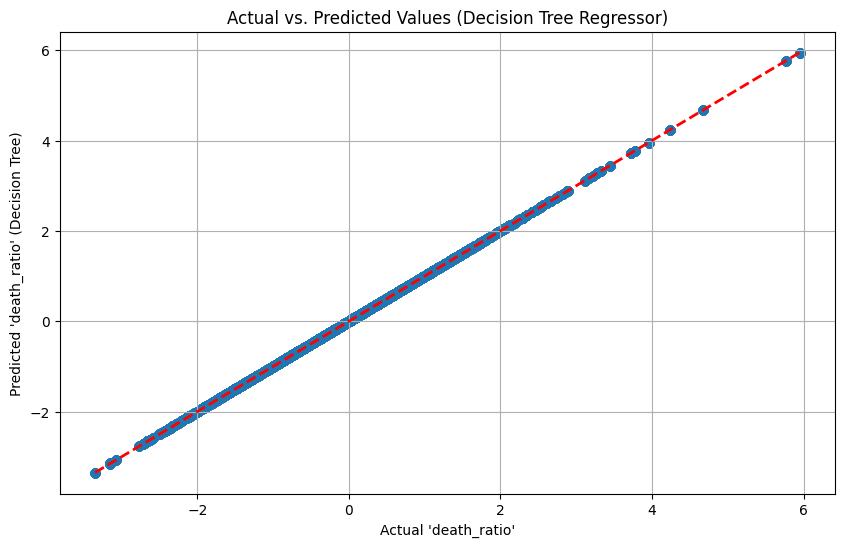

In [38]:
# Plotting actual vs predicted for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual 'death_ratio'")
plt.ylabel("Predicted 'death_ratio' (Decision Tree)")
plt.title("Actual vs. Predicted Values (Decision Tree Regressor)")
plt.grid(True)
plt.show()

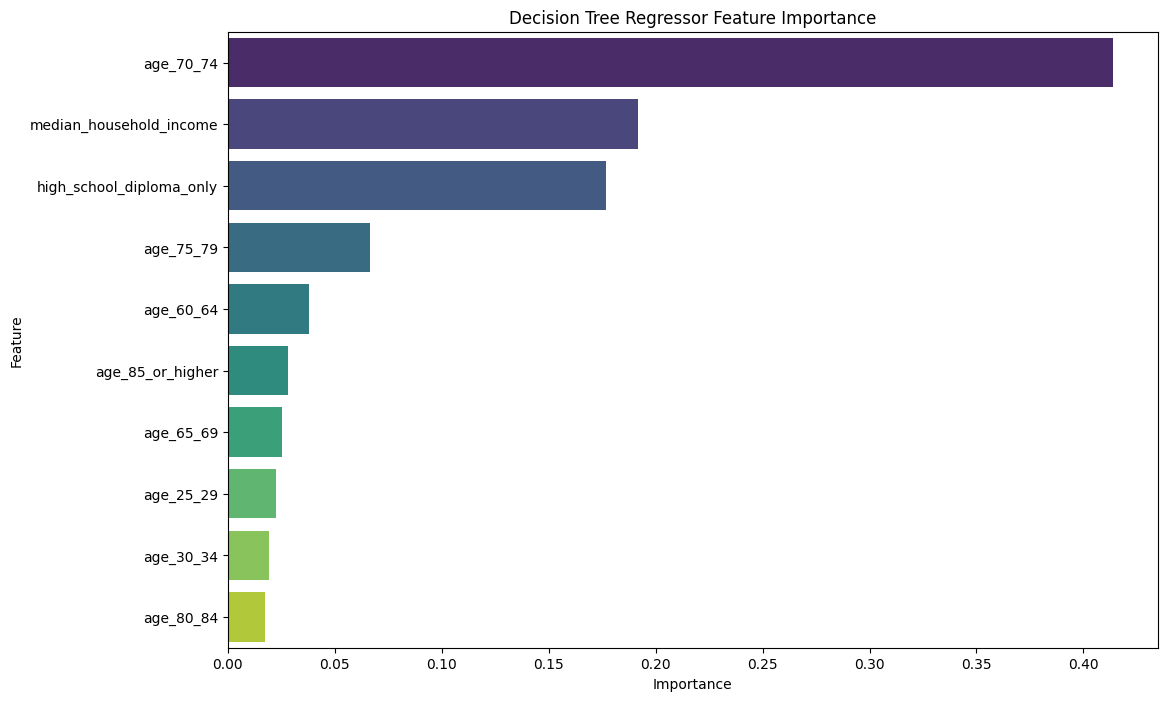

In [40]:
# Get feature importances from the trained Decision Tree Regressor model
feature_importances = dt_reg_model.feature_importances_

# Create a pandas Series for easier handling and sorting
importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances
sorted_importance = importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')
plt.title('Decision Tree Regressor Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

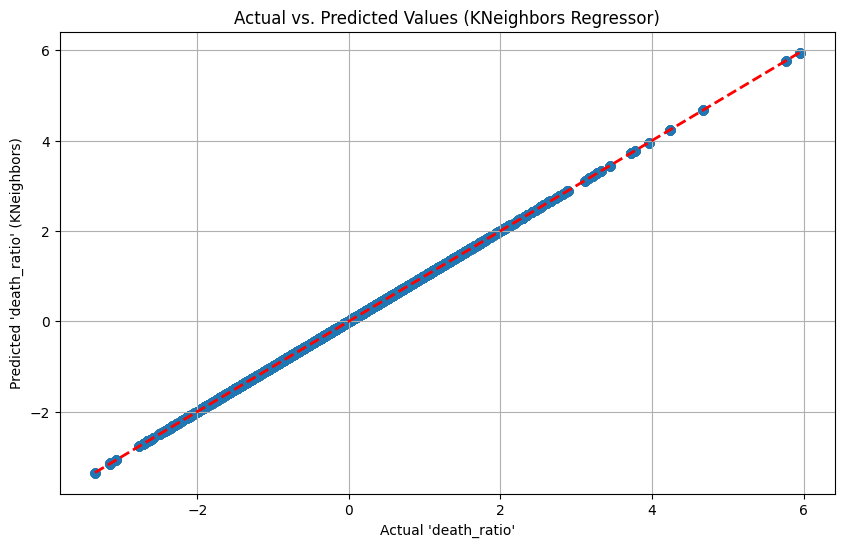

In [39]:
# Plotting actual vs predicted for KNeighbors Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual 'death_ratio'")
plt.ylabel("Predicted 'death_ratio' (KNeighbors)")
plt.title("Actual vs. Predicted Values (KNeighbors Regressor)")
plt.grid(True)
plt.show()

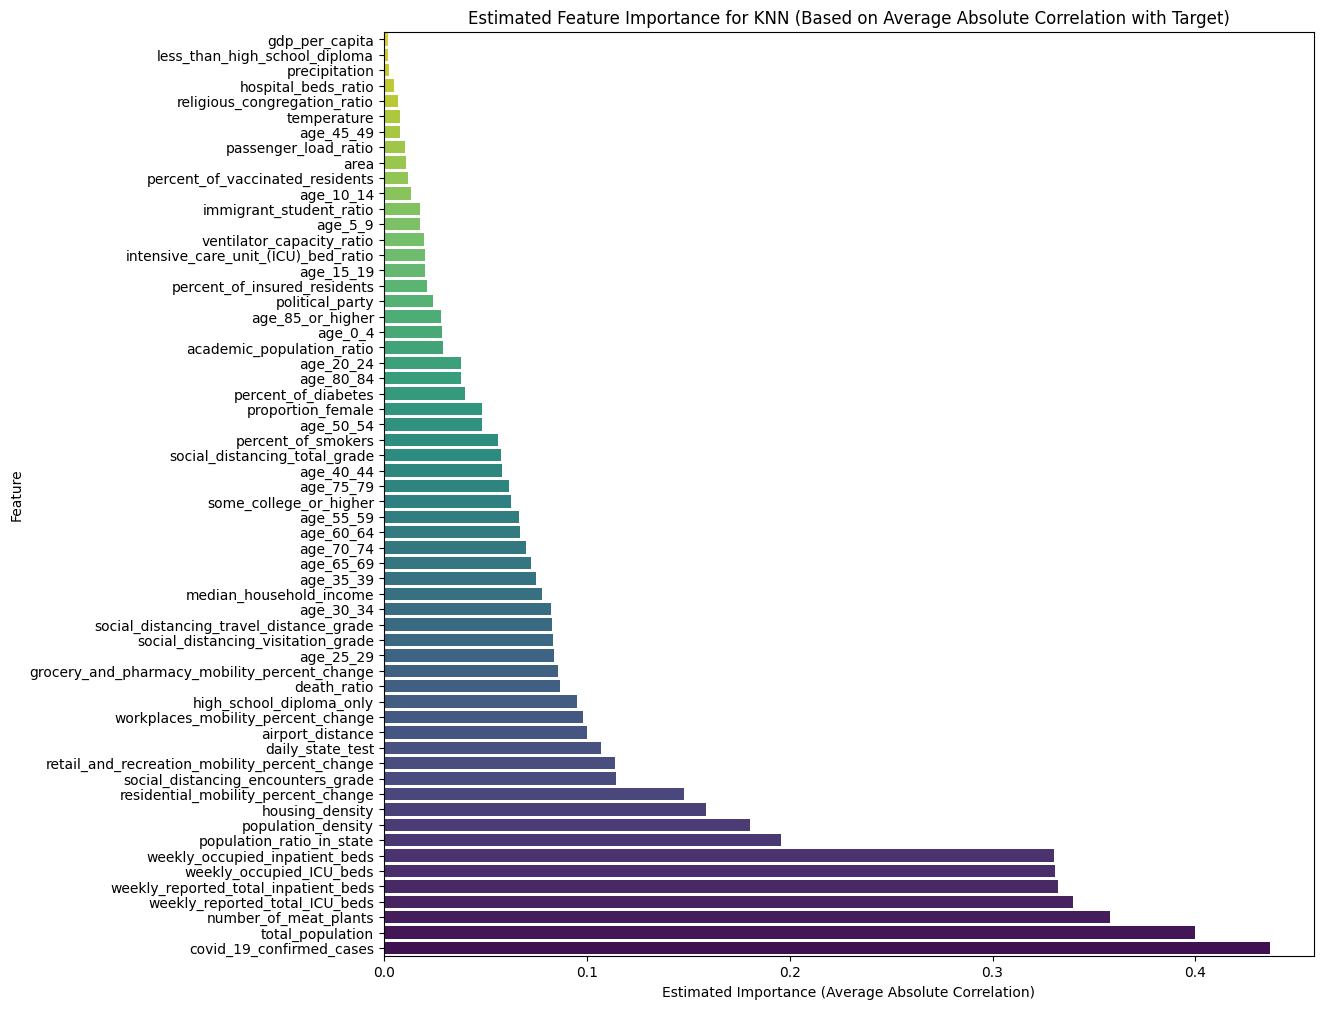

In [42]:
# Sort the previously calculated average absolute correlations
sorted_feature_importance = sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)
features = [feature for feature, importance in sorted_feature_importance]
importances = [importance for feature, importance in sorted_feature_importance]

# Plot the estimated feature importance (based on correlation)
plt.figure(figsize=(12, 12))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Estimated Feature Importance for KNN (Based on Average Absolute Correlation with Target)")
plt.xlabel('Estimated Importance (Average Absolute Correlation)')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Invert y-axis to show most important features at the top
plt.show()